# Day 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("time_series_2019-ncov-Confirmed.csv")
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [3]:
data.describe(include="all")

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,325,487,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
unique,323,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Diamond Princess,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,NaN,NaN,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,NaN,NaN,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,NaN,NaN,42.171200,22.380900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000


# Countries Graph

In [4]:
def remove_cols(data):
    rows = data.shape[0]
    for column in data[data.columns[4:]]:
#       print(column)
        n_zero = rows - (np.count_nonzero(data[column]))
#       print(n_zero)
        if n_zero >= (0.7 * rows):
            data.drop(columns = column, inplace = True)
            
    return data

In [5]:
df = remove_cols(data)

In [6]:
def plot_country(date, df, col_name):
    df = df[(df[[date,col_name]] != 0).all(axis=1)]
    countries = df[col_name].tolist()
    
    plt.style.use('ggplot')
    plt.barh(col_name, date, data = df[[date, col_name]], color = "red")
    plt.xlabel("Countries")
    plt.xticks(fontsize = 10)
    plt.ylabel("No of cases")
    plt.yticks(fontsize = 3)
    plt.title("Countries graph for COVID", fontsize = 20)
    plt.plot(figsize=(30, 16))
    plt.show()
    

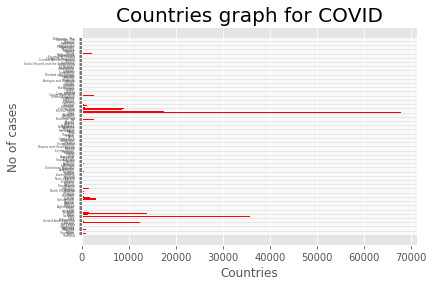

In [7]:
plot_country("3/18/20", df, "Country/Region")

# Dates Graph

In [8]:
def dates_graph(df):
    vals_list = df.iloc[[16]].values.tolist()
    country = vals_list[0][1]
    dates = vals_list[0][4:]
    print(dates)
    d_header = df.columns[4:].values.tolist()
    print(d_header)
    
    plt.style.use('ggplot')
    #plt.bar(dates, d_header)
    plt.plot(dates, d_header, label = "Line1")
    plt.xlabel("Cases")
    plt.xticks(fontsize = 15)
    plt.ylabel("Dates")
    plt.yticks(fontsize = 10)
    plt.legend('Cases')
    plt.title("Dates graph for COVID", fontsize = 20)
    plt.show()

[3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713, 41035, 47021, 53578, 59138]
['3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20']


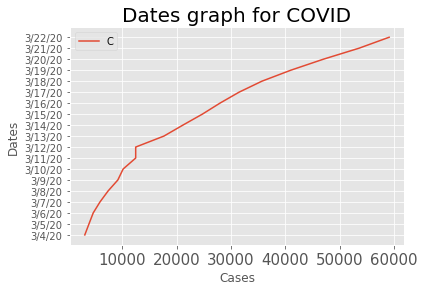

In [9]:
dates_graph(df)

# Continent Graph

For the datasets used here the author does not claim them as his own the reference of these datasets is included in the acknowledgements section

In [10]:
asia = pd.read_csv("as_countries.csv")
eu = pd.read_csv("eu_countries.csv")
af = pd.read_csv("af_countries.csv")

In [11]:
as_countries = asia['name'].values.tolist()
eu_countries = eu['name'].values.tolist()
af_countries = af['name'].values.tolist()
date = "3/4/20"


In [12]:
cases = df[date]
countries = df["Country/Region"]

In [13]:
ctr = 0
as_cases = 0
eu_cases = 0
af_cases = 0
for i in countries:
    if i in as_countries:
        as_cases+=cases[ctr]
    if i in eu_countries:
        eu_cases+=cases[ctr]
    if i in af_countries:
        af_cases+=cases[ctr]
    ctr+=1

In [14]:
cases_n = [as_cases, eu_cases, af_cases]
countries_n = ['Asia', 'Europe', 'Africa']

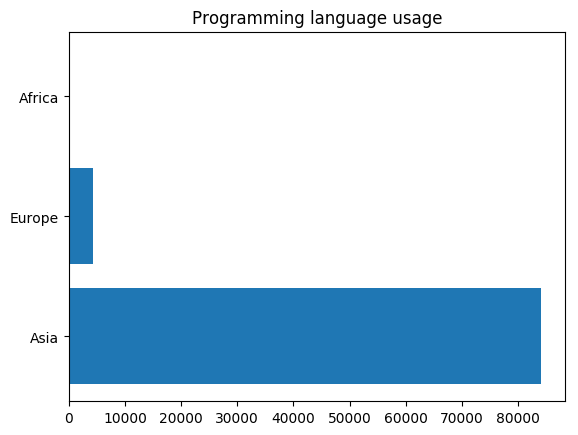

In [15]:
plt.rcdefaults()
plt.barh(countries_n, cases_n, align='center')
plt.title('Programming language usage')
plt.show()

# Acknowledgements

* COVID 19 dataset

* Countries Dataset
https://github.com/ajturner/acetate/tree/master/places
@ajturner on GitHub